In [1]:
import os
from utils.visualization import plot_train_val

In [2]:
save_dir = "tmp/plots"
os.makedirs(save_dir, exist_ok=True)
fontsize = 30

# 1. Baseline

Plot saved to tmp/plots/baselines_loss.pdf


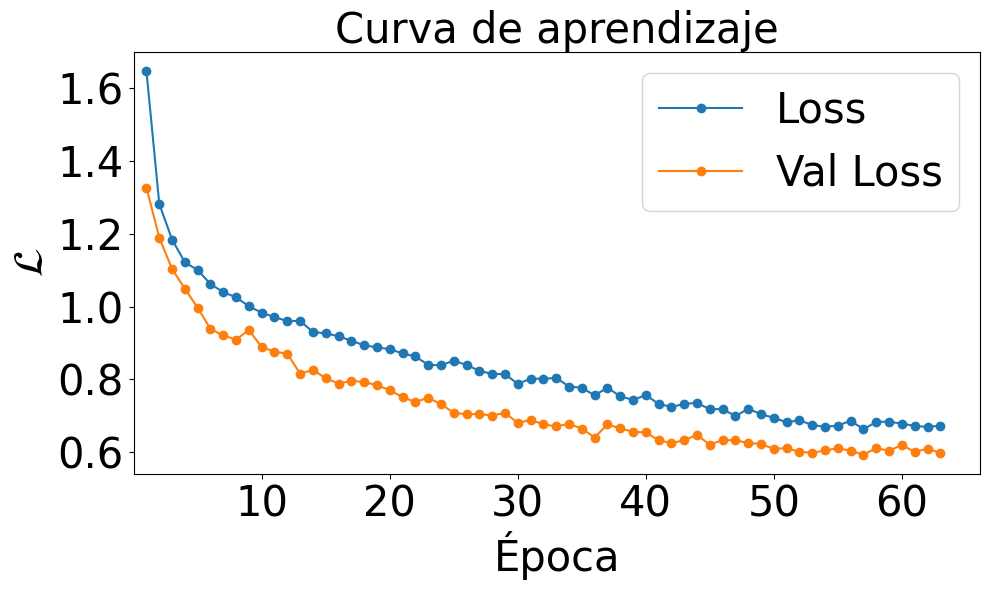

In [3]:
save_loss_baseline = os.path.join(save_dir, "baselines_loss.pdf")

plot_train_val(
	'saved/log/fCRP-prostate-reduced/0703_222008/info.log',
	y_label = '$\mathcal{L}$',
	save_file = save_loss_baseline,
	fontsize=fontsize
)

# 2. IIN-EfficientNet(vanilla)

Plot saved to tmp/plots/vanilla_loss.pdf


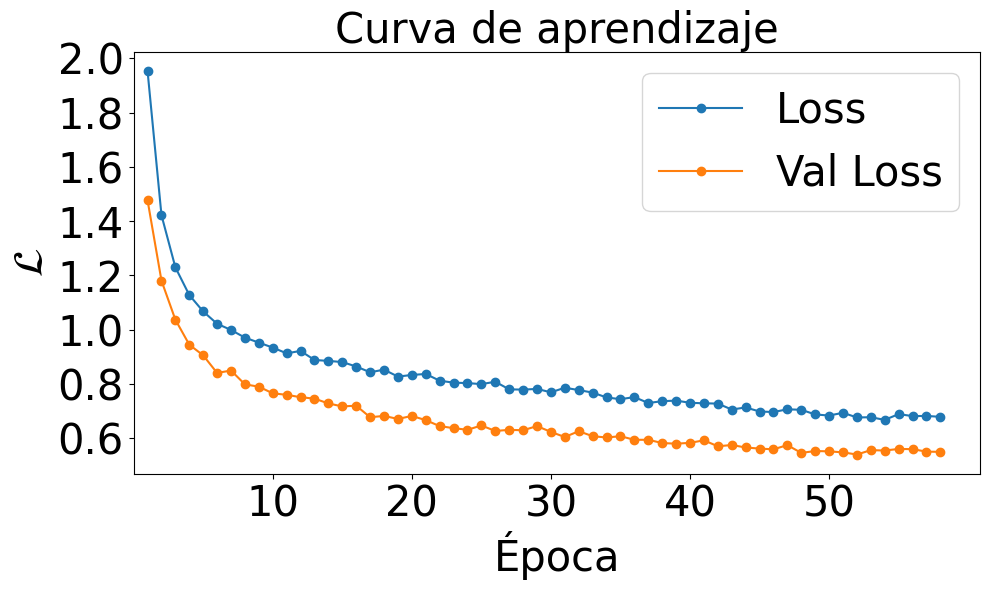

In [4]:
save_vanilla = os.path.join(save_dir, "vanilla_loss.pdf")

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0705_202504/info.log',
	y_label='$\mathcal{L}$',
	save_file=save_vanilla,
	fontsize=fontsize
)

# 3. IIN-EfficientNet(+cov)

Plot saved to tmp/plots/mcov_loss.pdf


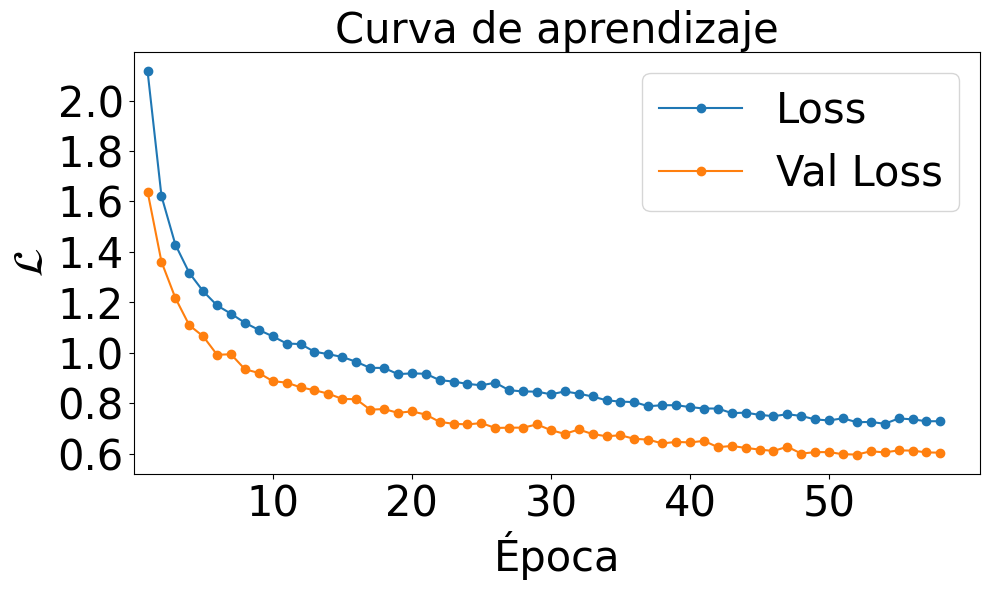

In [5]:
save_cov = os.path.join(save_dir, "mcov_loss.pdf")

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0706_113047/info.log',
	y_label='$\mathcal{L}$',
	save_file=save_cov,
	fontsize=fontsize
)

Plot saved to tmp/plots/mcov_loss_cov.pdf


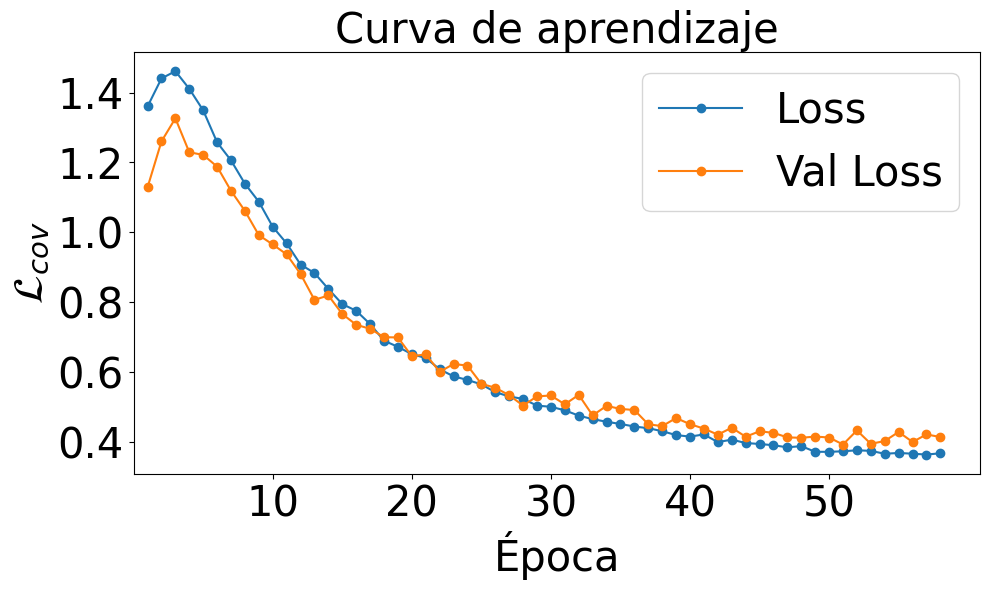

In [6]:
save_cov_cov = os.path.join(save_dir, "mcov_loss_cov.pdf")

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0706_113047/info.log',
	y_label='$\mathcal{L}_{cov}$',
	save_file=save_cov_cov,
	subloss_type='cov_loss',
	fontsize=fontsize
)

# 4. IIN-EfficientNet(+l2)

Plot saved to tmp/plots/l2_loss.pdf


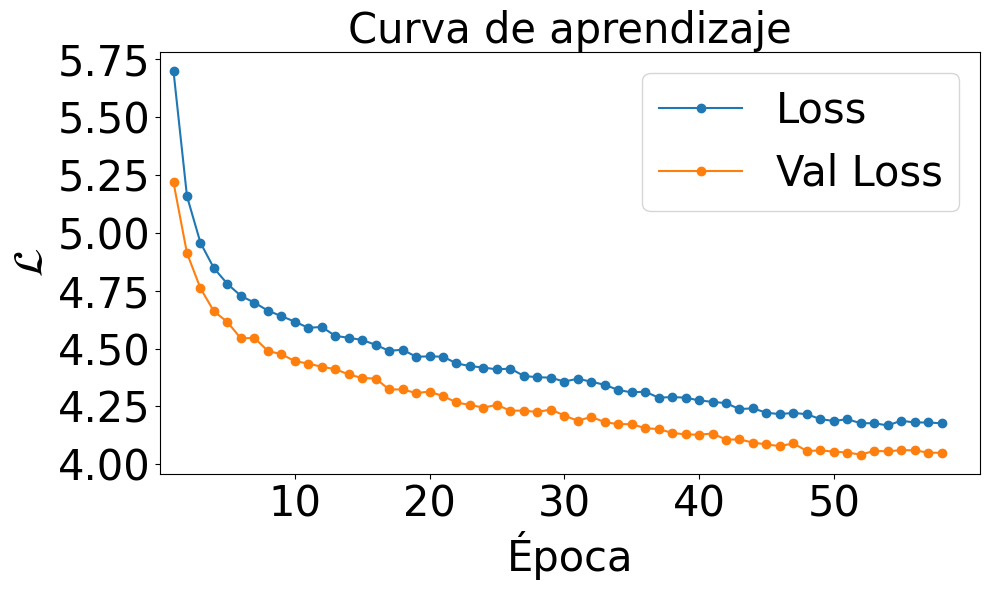

In [7]:
save_l2 = os.path.join(save_dir, "l2_loss.pdf")

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0708_151931/info.log',
	y_label='$\mathcal{L}$',
	save_file=save_l2,
	fontsize=fontsize
)

Plot saved to tmp/plots/l2_loss_l2.pdf


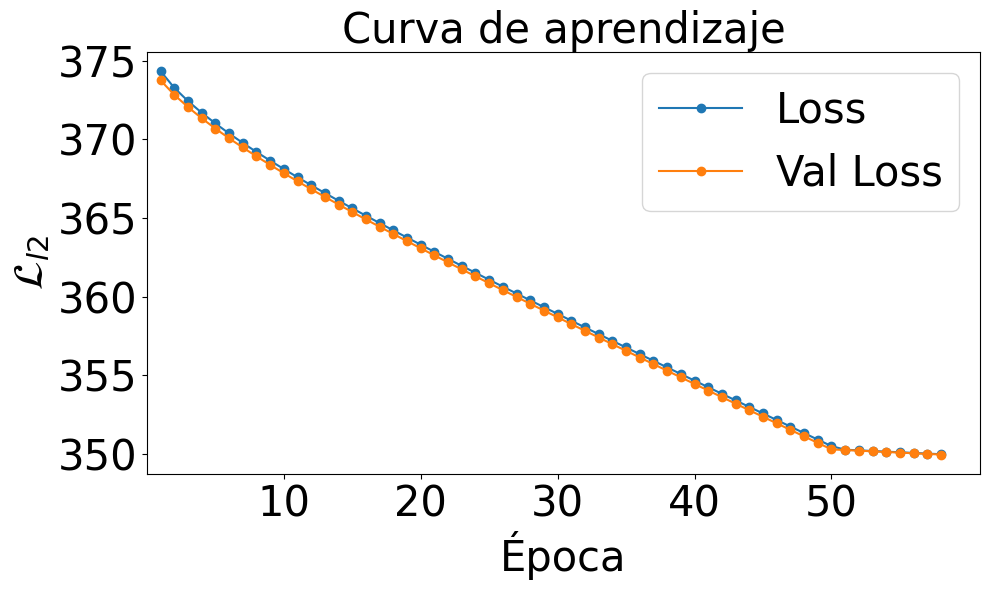

In [8]:
save_l2_l2 = os.path.join(save_dir, "l2_loss_l2.pdf")

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0708_151931/info.log',
	y_label='$\mathcal{L}_{l2}$',
	save_file=save_l2_l2,
	subloss_type='l2_loss',
	fontsize=fontsize
)

# 5. Propuesta

Plot saved to tmp/plots/propuesta_loss.pdf


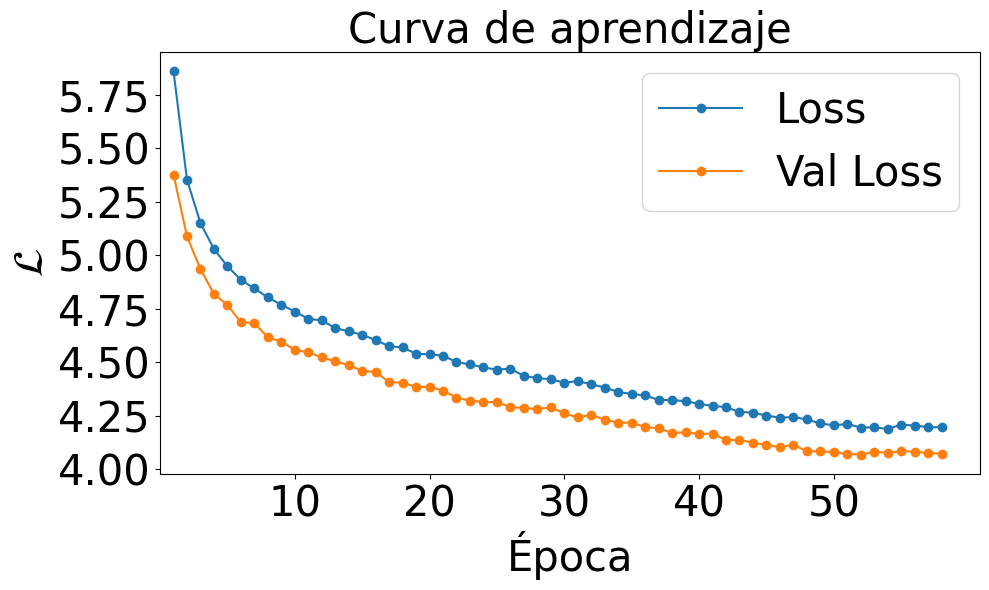

In [9]:
save_loss_propuesta = f"{save_dir}/propuesta_loss.pdf"

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0708_151820/info.log',
	y_label='$\mathcal{L}$',
	save_file=save_loss_propuesta,
	fontsize=fontsize,
	smooth=False
)

Plot saved to tmp/plots/propuesta_nll_loss.pdf


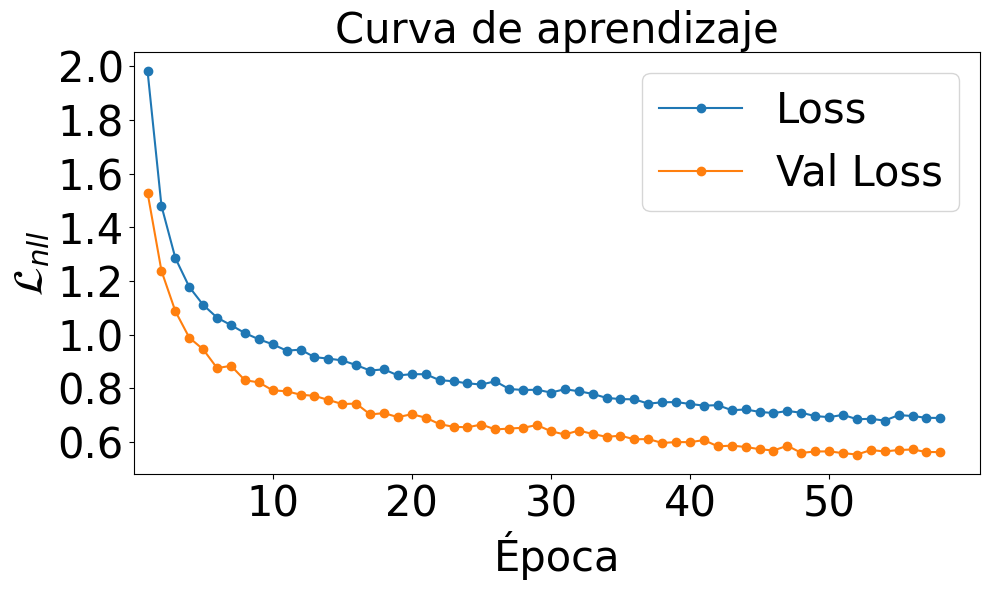

In [10]:
save_nll_propuesta = f"{save_dir}/propuesta_nll_loss.pdf"

# plot_train_val('saved/log/xMI-Efficient/0607_173559/info.log', subloss_type='nll_loss', y_label='\mathcal{L}_{\text{total}}')
plot_train_val('saved/log/xMI-Efficient-reduced/0708_151820/info.log', subloss_type='nll_loss', y_label='$\mathcal{L}_{nll}$',
	save_file=save_nll_propuesta,
	fontsize=fontsize,
	smooth=False
	)

Plot saved to tmp/plots/propuesta_cov_loss.pdf


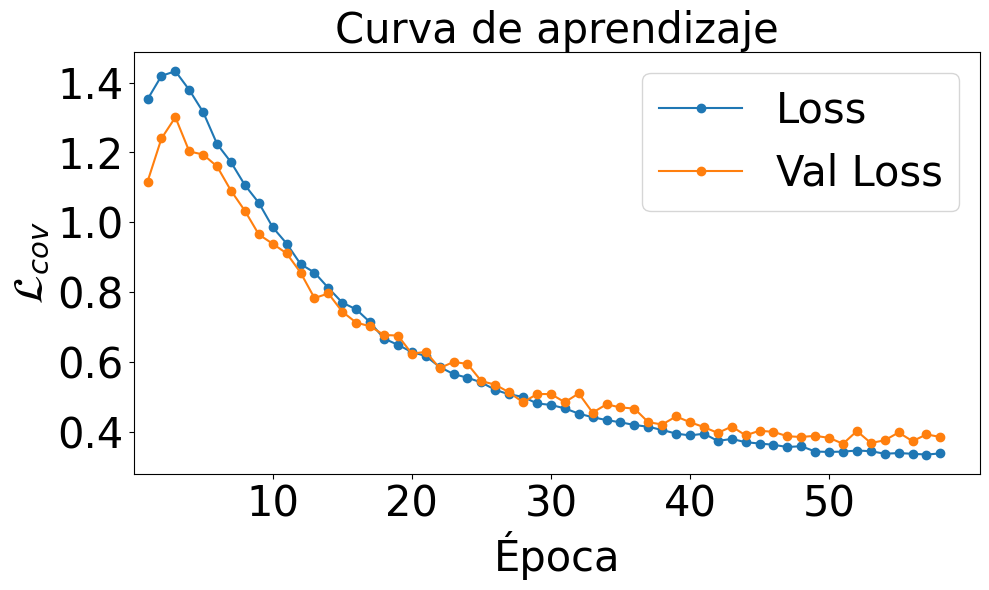

In [11]:
save_cov_propuesta = f"{save_dir}/propuesta_cov_loss.pdf"

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0708_151820/info.log',
	subloss_type='cov_loss',
	y_label='$\mathcal{L}_{cov}$',
	save_file=save_cov_propuesta,
	fontsize=fontsize,
	smooth=False
)

Plot saved to tmp/plots/propuesta_l2_loss.pdf


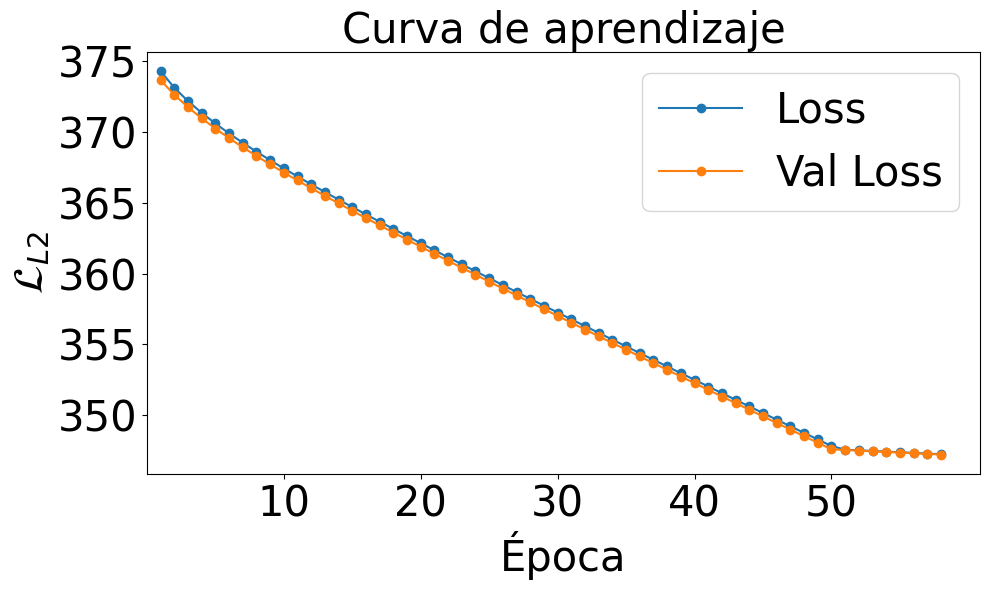

In [12]:
save_l2_propuesta = f"{save_dir}/propuesta_l2_loss.pdf"

plot_train_val(
	'saved/log/xMI-Efficient-reduced/0708_151820/info.log',
	subloss_type='l2_loss',
	y_label='$\mathcal{L}_{L2}$',
	save_file=save_l2_propuesta,
	fontsize=fontsize,
	smooth=False
)

# 6. Múltiples

In [13]:
import re
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def plot_multiple_train_val(named_log_path_list, save_file_prefix=None, y_label='Loss', title_prefix='Curva de aprendizaje', subloss_type=None, fontsize=20, smooth=False, sigma=1):
    """
    Plot multiple log paths with separate plots for loss and validation loss.
    
    Args:
        named_log_path_list: List of tuples (name, log_path)
        save_file_prefix: Prefix for save files (will add '_loss.pdf' and '_val_loss.pdf')
        y_label: Label for y-axis
        title_prefix: Prefix for plot titles
        subloss_type: Type of subloss to plot (None for total loss)
        fontsize: Font size for labels
        smooth: Whether to apply smoothing
        sigma: Sigma for Gaussian smoothing
    """
    # Regex patterns
    epoch_re = re.compile(r"epoch\s*:\s*(\d+)")
    if subloss_type is None:
        loss_re = re.compile(r"loss\s*:\s*([0-9\.eE+-]+)")
        val_loss_re = re.compile(r"val_loss\s*:\s*([0-9\.eE+-]+)")
    else:
        loss_re = re.compile(r"loss/{0}\s*:\s*([0-9\.eE+-]+)".format(re.escape(subloss_type)))
        val_loss_re = re.compile(r"val_loss/{0}\s*:\s*([0-9\.eE+-]+)".format(re.escape(subloss_type)))
    
    # Parse all log files
    all_data = {}
    for name, log_path in named_log_path_list:
        epochs = []
        losses = []
        val_losses = []
        
        with open(log_path, "r") as f:
            lines = f.readlines()
        
        i = 0
        while i < len(lines):
            line = lines[i]
            epoch_match = epoch_re.search(line)
            if epoch_match:
                epoch = int(epoch_match.group(1))
                loss = None
                val_loss = None
                # Search for loss and val_loss in the next 20 lines
                for j in range(1, 20):
                    if i + j < len(lines):
                        l2 = lines[i + j]
                        if loss is None:
                            m = loss_re.search(l2)
                            if m:
                                loss = float(m.group(1))
                        if val_loss is None:
                            m = val_loss_re.search(l2)
                            if m:
                                val_loss = float(m.group(1))
                    if loss is not None and val_loss is not None:
                        break
                if loss is not None and val_loss is not None:
                    epochs.append(epoch)
                    losses.append(loss)
                    val_losses.append(val_loss)
            i += 1
        
        if epochs:
            all_data[name] = {
                'epochs': epochs,
                'losses': losses,
                'val_losses': val_losses
            }
        else:
            print(f"No epochs found in log: {name}")
    
    if not all_data:
        print("No valid data found in any log files.")
        return
    
    # Create two separate plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot 1: Training Loss
    for name, data in all_data.items():
        epochs = data['epochs']
        losses = data['losses']
        
        if smooth:
            losses_smooth = gaussian_filter1d(losses, sigma=sigma)
            ax1.plot(epochs, losses, 'o-', alpha=0.3, label=f"{name} (raw)")
            ax1.plot(epochs, losses_smooth, '-', linewidth=2, label=f"{name} (smoothed)")
        else:
            ax1.plot(epochs, losses, 'o-', label=name)
    
    ax1.set_xlabel("Época", fontsize=fontsize)
    ax1.set_ylabel(y_label, fontsize=fontsize)
    ax1.set_title(f"{title_prefix} - Entrenamiento", fontsize=fontsize)
    ax1.legend(fontsize=fontsize-2)
    ax1.set_xlim(left=0)
    ax1.tick_params(axis='both', which='major', labelsize=fontsize-2)
    
    # Plot 2: Validation Loss
    for name, data in all_data.items():
        epochs = data['epochs']
        val_losses = data['val_losses']
        
        if smooth:
            val_losses_smooth = gaussian_filter1d(val_losses, sigma=sigma)
            ax2.plot(epochs, val_losses, 'o-', alpha=0.3, label=f"{name} (raw)")
            ax2.plot(epochs, val_losses_smooth, '-', linewidth=2, label=f"{name} (smoothed)")
        else:
            ax2.plot(epochs, val_losses, 'o-', label=name)
    
    ax2.set_xlabel("Época", fontsize=fontsize)
    ax2.set_ylabel(y_label, fontsize=fontsize)
    ax2.set_title(f"{title_prefix} - Validación", fontsize=fontsize)
    ax2.legend(fontsize=fontsize-2)
    ax2.set_xlim(left=0)
    ax2.tick_params(axis='both', which='major', labelsize=fontsize-2)
    
    plt.tight_layout()
    
    # Save plots if requested
    if save_file_prefix:
        loss_file = f"{save_file_prefix}_loss.pdf"
        val_loss_file = f"{save_file_prefix}_val_loss.pdf"
        
        # Save individual plots
        fig1, ax1_single = plt.subplots(figsize=(10, 6))
        for name, data in all_data.items():
            epochs = data['epochs']
            losses = data['losses']
            
            if smooth:
                losses_smooth = gaussian_filter1d(losses, sigma=sigma)
                ax1_single.plot(epochs, losses, 'o-', alpha=0.3, label=f"{name} (raw)")
                ax1_single.plot(epochs, losses_smooth, '-', linewidth=2, label=f"{name} (smoothed)")
            else:
                ax1_single.plot(epochs, losses, 'o-', label=name)
        
        ax1_single.set_xlabel("Época", fontsize=fontsize)
        ax1_single.set_ylabel(y_label, fontsize=fontsize)
        ax1_single.set_title(f"{title_prefix} - Entrenamiento", fontsize=fontsize)
        ax1_single.legend(fontsize=fontsize)
        ax1_single.set_xlim(left=0)
        ax1_single.tick_params(axis='both', which='major', labelsize=fontsize)
        plt.tight_layout()
        plt.savefig(loss_file, format='pdf')
        plt.close(fig1)
        
        fig2, ax2_single = plt.subplots(figsize=(10, 6))
        for name, data in all_data.items():
            epochs = data['epochs']
            val_losses = data['val_losses']
            
            if smooth:
                val_losses_smooth = gaussian_filter1d(val_losses, sigma=sigma)
                ax2_single.plot(epochs, val_losses, 'o-', alpha=0.3, label=f"{name} (raw)")
                ax2_single.plot(epochs, val_losses_smooth, '-', linewidth=2, label=f"{name} (smoothed)")
            else:
                ax2_single.plot(epochs, val_losses, 'o-', label=name)
        
        ax2_single.set_xlabel("Época", fontsize=fontsize)
        ax2_single.set_ylabel(y_label, fontsize=fontsize)
        ax2_single.set_title(f"{title_prefix} - Validación", fontsize=fontsize)
        ax2_single.legend(fontsize=fontsize)
        ax2_single.set_xlim(left=0)
        ax2_single.tick_params(axis='both', which='major', labelsize=fontsize)
        plt.tight_layout()
        plt.savefig(val_loss_file, format='pdf')
        plt.close(fig2)
        
        print(f"Training loss plot saved to {loss_file}")
        print(f"Validation loss plot saved to {val_loss_file}")
    
    plt.show()

Training loss plot saved to tmp/plots/comparison_all_loss.pdf
Validation loss plot saved to tmp/plots/comparison_all_val_loss.pdf


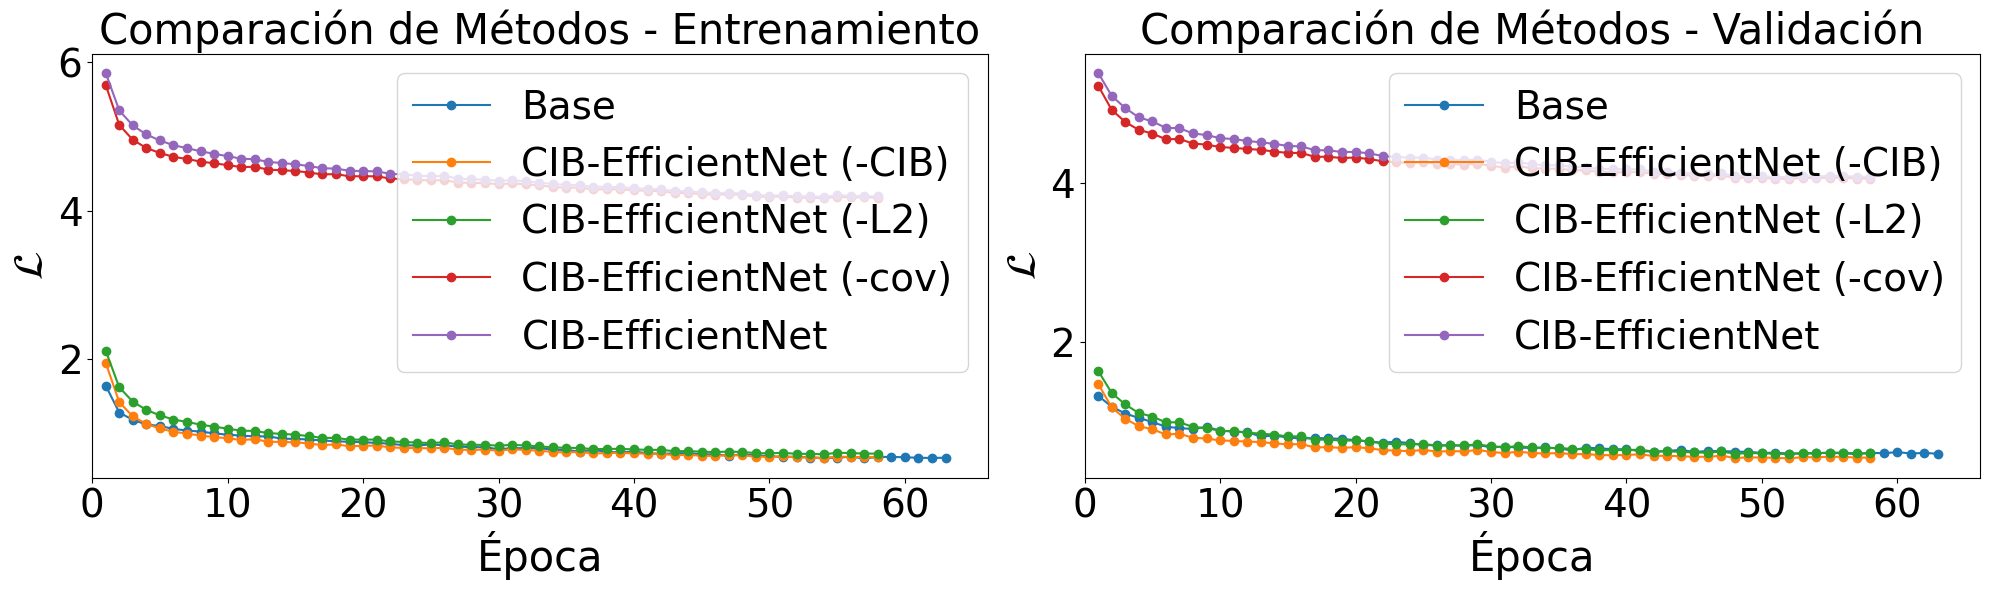

In [14]:
# Example usage of the multiple log plotting function
named_log_paths = [
    ("Base", 'saved/log/fCRP-prostate-reduced/0703_222008/info.log'),
    ("CIB-EfficientNet (-CIB)", 'saved/log/xMI-Efficient-reduced/0705_202504/info.log'),
    ("CIB-EfficientNet (-L2)", 'saved/log/xMI-Efficient-reduced/0706_113047/info.log'),
    ("CIB-EfficientNet (-cov)", 'saved/log/xMI-Efficient-reduced/0708_151931/info.log'),
    ("CIB-EfficientNet", 'saved/log/xMI-Efficient-reduced/0708_151820/info.log')
]

save_comparison_prefix = os.path.join(save_dir, "comparison_all")

plot_multiple_train_val(
    named_log_path_list=named_log_paths,
    save_file_prefix=save_comparison_prefix,
    y_label='$\mathcal{L}$',
    title_prefix='Comparación de Métodos',
    fontsize=fontsize,
    smooth=False
)

Training loss plot saved to tmp/plots/comparison_nll_simple_loss.pdf
Validation loss plot saved to tmp/plots/comparison_nll_simple_val_loss.pdf


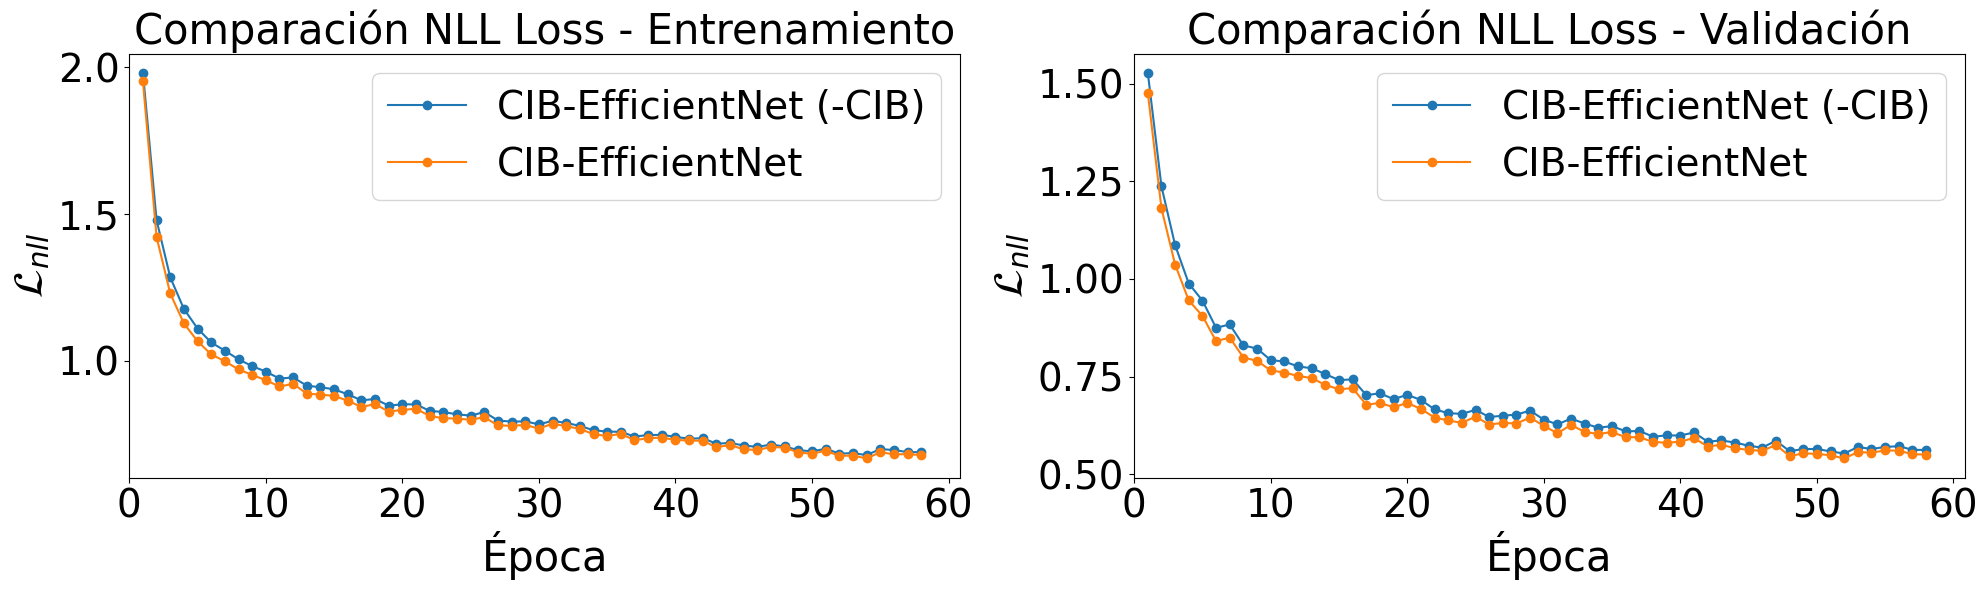

In [15]:
# Example for plotting NLL loss comparison
named_log_paths_nll = [
    ("CIB-EfficientNet (-CIB)", 'saved/log/xMI-Efficient-reduced/0708_151820/info.log'),
    ("CIB-EfficientNet", 'saved/log/xMI-Efficient-reduced/0705_202504/info.log')
]

save_nll_comparison_prefix = os.path.join(save_dir, "comparison_nll_simple")

plot_multiple_train_val(
    named_log_path_list=named_log_paths_nll,
    save_file_prefix=save_nll_comparison_prefix,
    y_label='$\mathcal{L}_{nll}$',
    title_prefix='Comparación NLL Loss',
    subloss_type='nll_loss',
    fontsize=fontsize,
    smooth=False
)

Training loss plot saved to tmp/plots/comparison_nll_loss.pdf
Validation loss plot saved to tmp/plots/comparison_nll_val_loss.pdf


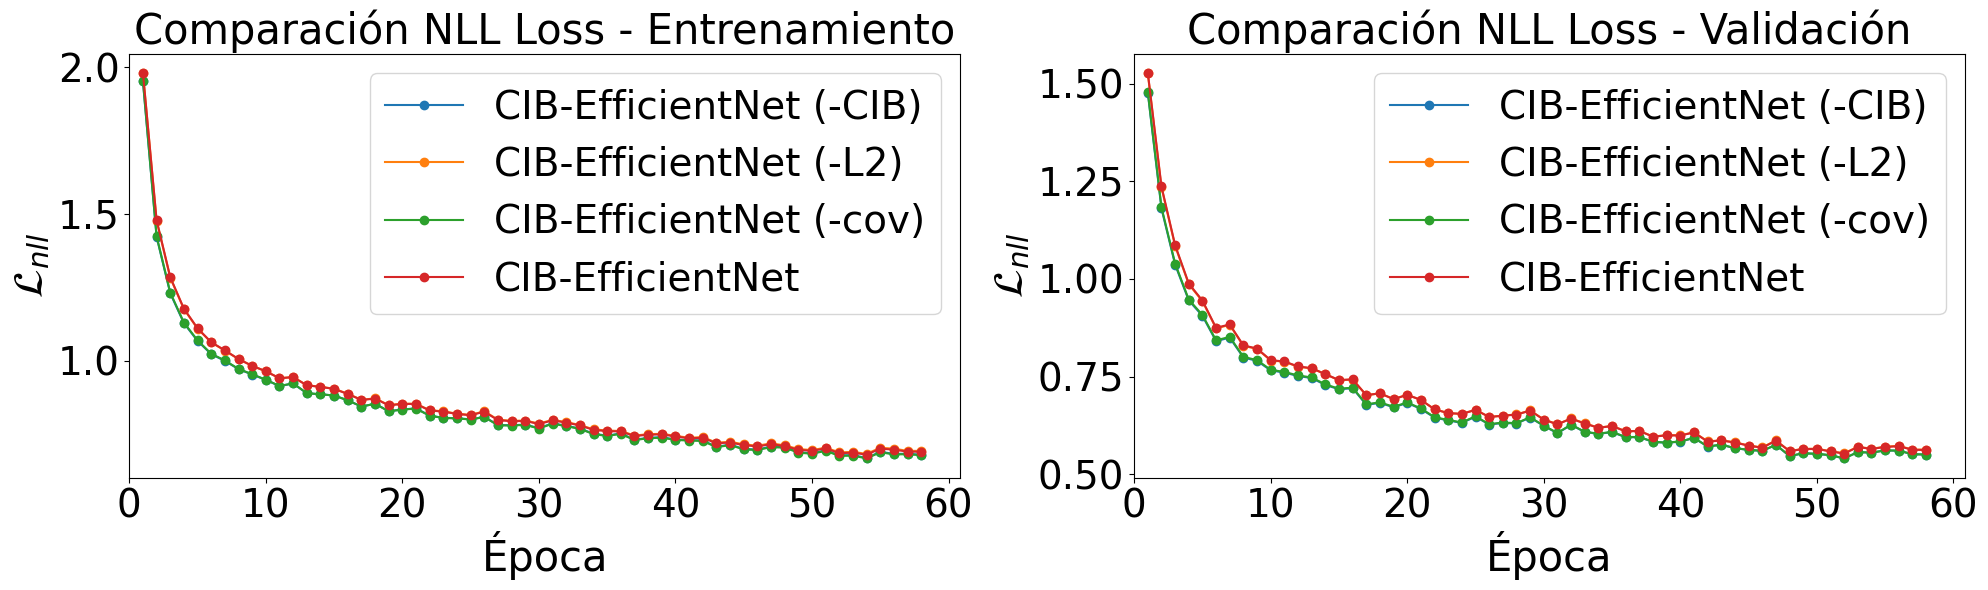

In [16]:
# Example for plotting NLL loss comparison
named_log_paths_nll = [
    ("CIB-EfficientNet (-CIB)", 'saved/log/xMI-Efficient-reduced/0705_202504/info.log'),
    ("CIB-EfficientNet (-L2)", 'saved/log/xMI-Efficient-reduced/0706_113047/info.log'),
    ("CIB-EfficientNet (-cov)", 'saved/log/xMI-Efficient-reduced/0708_151931/info.log'),
    ("CIB-EfficientNet", 'saved/log/xMI-Efficient-reduced/0708_151820/info.log')
]

save_nll_comparison_prefix = os.path.join(save_dir, "comparison_nll")

plot_multiple_train_val(
    named_log_path_list=named_log_paths_nll,
    save_file_prefix=save_nll_comparison_prefix,
    y_label='$\mathcal{L}_{nll}$',
    title_prefix='Comparación NLL Loss',
    subloss_type='nll_loss',
    fontsize=fontsize,
    smooth=False
)

Training loss plot saved to tmp/plots/comparison_cov_loss.pdf
Validation loss plot saved to tmp/plots/comparison_cov_val_loss.pdf


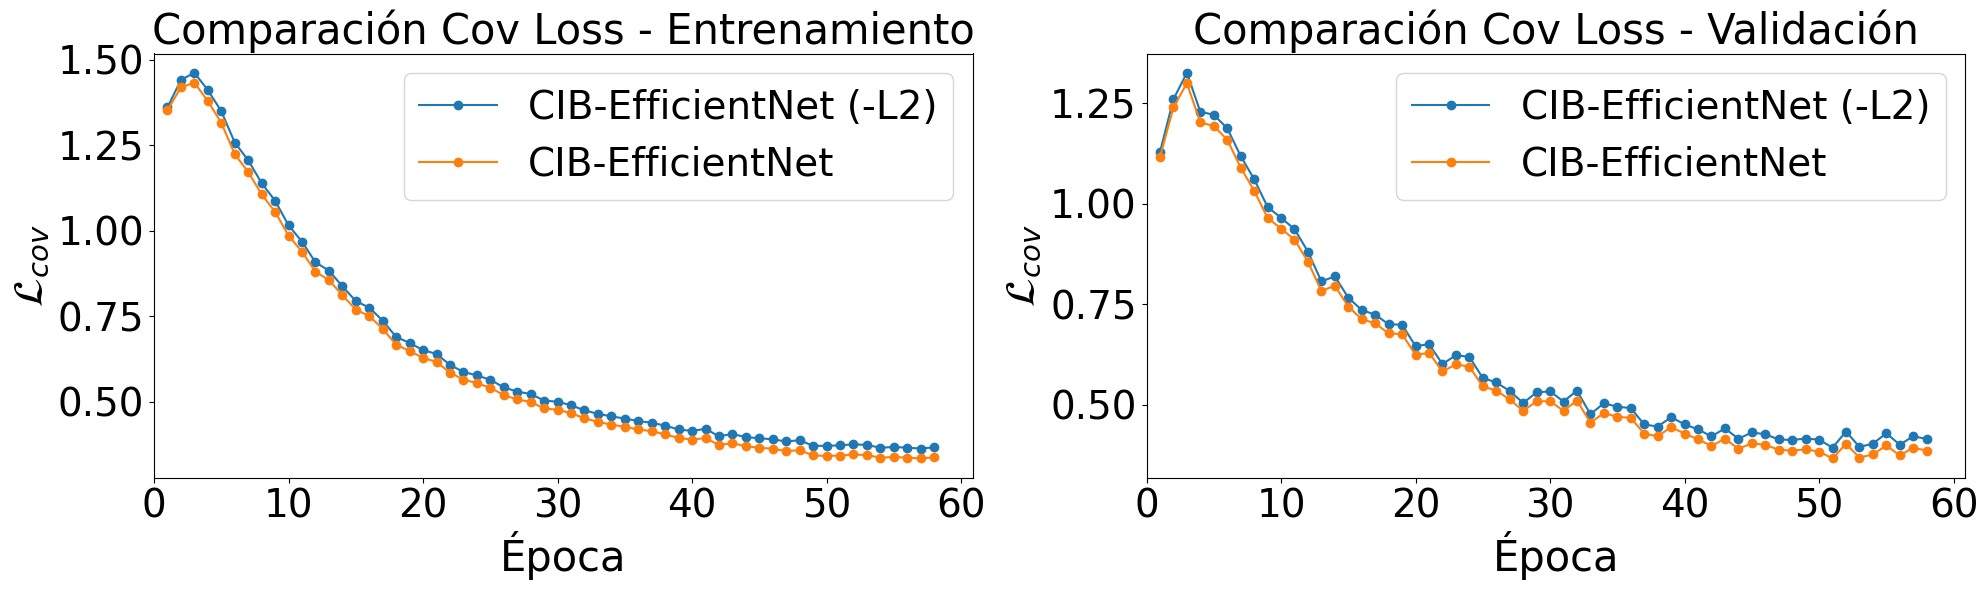

In [17]:
save_cov_comparison_prefix = os.path.join(save_dir, "comparison_cov")

named_log_paths_cov = [
	("CIB-EfficientNet (-L2)", 'saved/log/xMI-Efficient-reduced/0706_113047/info.log'),
	("CIB-EfficientNet", 'saved/log/xMI-Efficient-reduced/0708_151820/info.log')
]

plot_multiple_train_val(
	named_log_path_list=named_log_paths_cov,
	save_file_prefix=save_cov_comparison_prefix,
	y_label='$\mathcal{L}_{cov}$',
	title_prefix='Comparación Cov Loss',
	subloss_type='cov_loss',
	fontsize=fontsize,
	smooth=False
)

Training loss plot saved to tmp/plots/comparison_l2_loss.pdf
Validation loss plot saved to tmp/plots/comparison_l2_val_loss.pdf


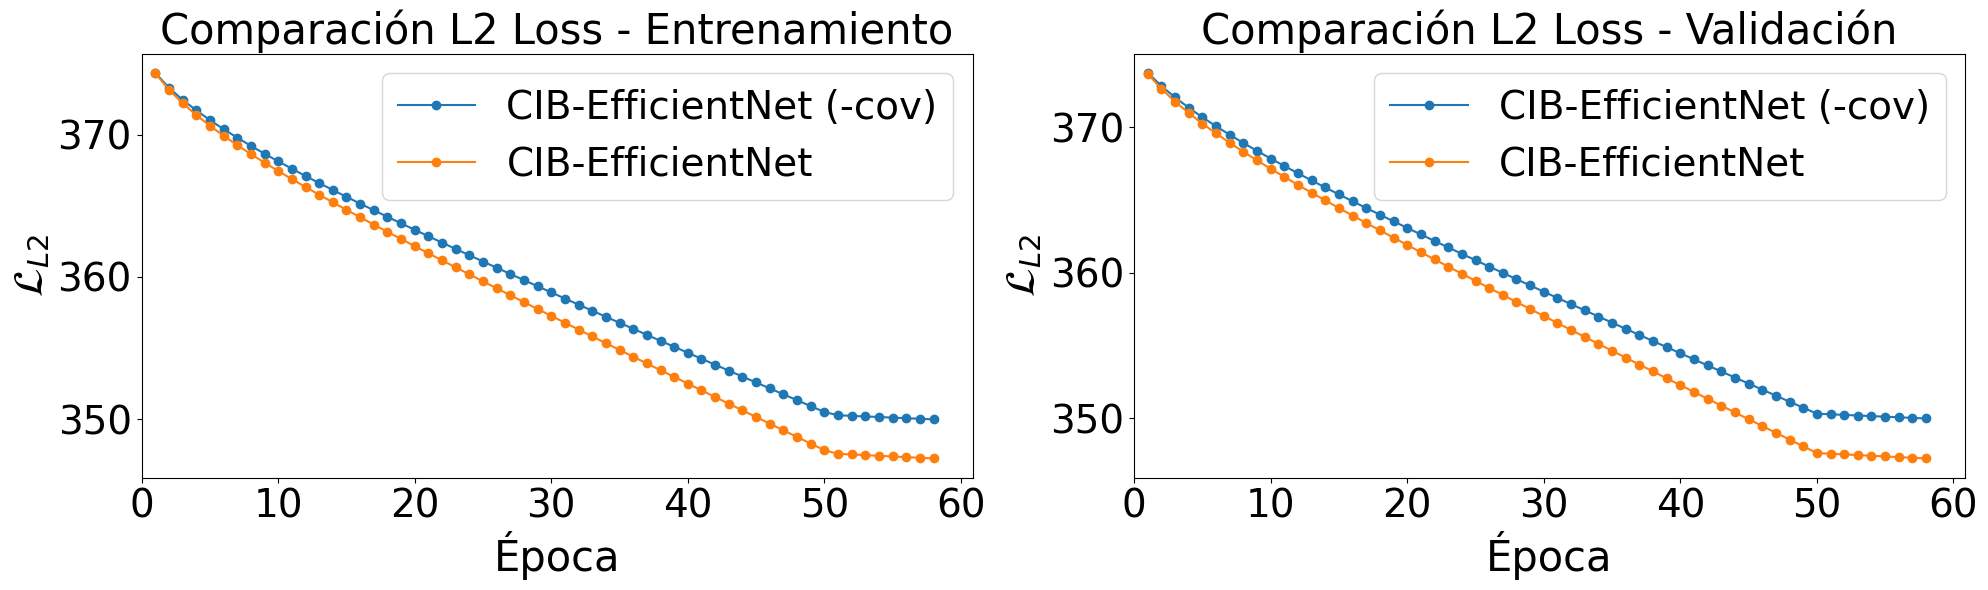

In [18]:
save_l2_comparison_prefix = os.path.join(save_dir, "comparison_l2")

named_log_paths_l2 = [
	("CIB-EfficientNet (-cov)", 'saved/log/xMI-Efficient-reduced/0708_151931/info.log'),
	("CIB-EfficientNet", 'saved/log/xMI-Efficient-reduced/0708_151820/info.log')
]

plot_multiple_train_val(
	named_log_path_list=named_log_paths_l2,
	save_file_prefix=save_l2_comparison_prefix,
	y_label='$\mathcal{L}_{L2}$',
	title_prefix='Comparación L2 Loss',
	subloss_type='l2_loss',
	fontsize=fontsize,
	smooth=False
)

In [19]:
!ls {save_dir}

baselines_loss.pdf		    l2_loss_l2.pdf
comparison_all_loss.pdf		    loss_baseline.pdf
comparison_all_val_loss.pdf	    loss_cov.pdf
comparison_cov_loss.pdf		    loss_vanilla.pdf
comparison_cov_val_loss.pdf	    mcov_loss.pdf
comparison_l2_loss.pdf		    mcov_loss_cov.pdf
comparison_l2_val_loss.pdf	    propuesta_cov_loss.pdf
comparison_nll_loss.pdf		    propuesta_l2_loss.pdf
comparison_nll_simple_loss.pdf	    propuesta_loss.pdf
comparison_nll_simple_val_loss.pdf  propuesta_nll_loss.pdf
comparison_nll_val_loss.pdf	    vanilla_loss.pdf
l2_loss.pdf


In [21]:
!zip -r {save_dir}.zip {save_dir}/*

updating: tmp/plots/baselines_loss.pdf (deflated 33%)
updating: tmp/plots/comparison_all_loss.pdf (deflated 31%)
updating: tmp/plots/comparison_all_val_loss.pdf (deflated 31%)
updating: tmp/plots/comparison_cov_loss.pdf (deflated 39%)
updating: tmp/plots/comparison_cov_val_loss.pdf (deflated 39%)
updating: tmp/plots/comparison_l2_loss.pdf (deflated 39%)
updating: tmp/plots/comparison_l2_val_loss.pdf (deflated 39%)
updating: tmp/plots/comparison_nll_loss.pdf (deflated 37%)
updating: tmp/plots/comparison_nll_simple_loss.pdf (deflated 39%)
updating: tmp/plots/comparison_nll_simple_val_loss.pdf (deflated 39%)
updating: tmp/plots/comparison_nll_val_loss.pdf (deflated 37%)
updating: tmp/plots/l2_loss.pdf (deflated 35%)
updating: tmp/plots/l2_loss_l2.pdf (deflated 40%)
updating: tmp/plots/loss_baseline.pdf (deflated 33%)
updating: tmp/plots/loss_cov.pdf (deflated 34%)
updating: tmp/plots/loss_vanilla.pdf (deflated 33%)
updating: tmp/plots/mcov_loss.pdf (deflated 34%)
updating: tmp/plots/mcov_